# About the notebook
- title: "BIOS824 Case Studies HW02"
- author: "Kuei-Yueh Ko"


In [1]:
### library: basic
import numpy as np

### library: keras
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

### library: reading images
from keras import applications
from keras.preprocessing import image

### library: plotting
import matplotlib.pyplot as plt

### helper function
head = lambda x, n = 6: x[:n]
tail = lambda x, n = 6: x[-n:]

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


**set directory**

In [2]:
### Mounting google drive
from google.colab import drive
drive.mount('/content/gdrive')

%cd "/content/gdrive/My Drive/Colab Notebooks/Duke_BIOS824_CaseStudies"
!pwd
!ls

ModuleNotFoundError: No module named 'google.colab'

-----

# Load MNIST data and preprocess
The MNIST data can be loaded from Keras datasets.

**Load MNIST data and preprocess images**

In [3]:
### input image dimensions
img_rows, img_cols = 28, 28

### the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255
x_test  /= 255

### Add Channel Dimension
### (N, 28, 28) -> (N, 28, 28, 1)
### (N, 28, 28) -> (N, 1, 28, 28)
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
### observe data dimension
print("X_train:", x_train.shape)
print("y_train:", y_train.shape)
print("X_test: ", x_test.shape)
print("y_test: ", y_test.shape)

X_train: (60000, 28, 28, 1)
y_train: (60000,)
X_test:  (10000, 28, 28, 1)
y_test:  (10000,)


In [4]:
K.image_data_format()

'channels_last'

In [5]:
x_train[0].shape

(28, 28, 1)

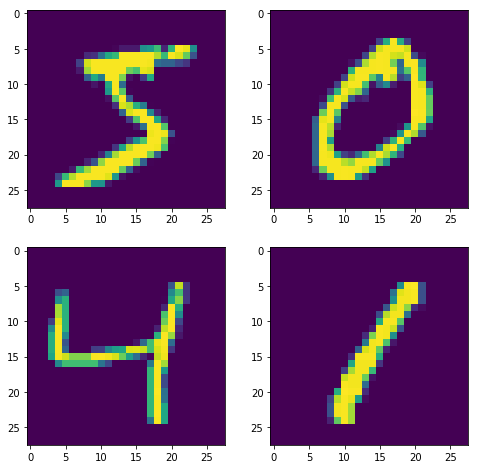

In [6]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize = (8, 8))

axes[0, 0].imshow(x_train[0][:, :, 0])

axes[0, 1].imshow(x_train[1][:, :, 0])

axes[1, 0].imshow(x_train[2][:, :, 0])

axes[1, 1].imshow(x_train[3][:, :, 0])
pass

**Preprocess class labels**

In [7]:
# number of classes
num_classes = 10

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print("y_train:", y_train.shape)
print("y_test: ", y_test.shape)

y_train: (60000, 10)
y_test:  (10000, 10)


In [8]:
print(y_train[:3])
print("=============================")
print(np.where(y_train[:3] == 1.0)[1])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[5 0 4]


In [9]:
### observe data dimension
print("X_train:", x_train.shape)
print("y_train:", y_train.shape)
print("X_test: ", x_test.shape)
print("y_test: ", y_test.shape)

X_train: (60000, 28, 28, 1)
y_train: (60000, 10)
X_test:  (10000, 28, 28, 1)
y_test:  (10000, 10)


# Building model and train

In [10]:
### Convolutional Neural Network
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

### Multilayer Perceptron (fully connected network)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

### Softmax operation
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

### model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [11]:
### define number of epoch
epochs     = 15
batch_size = 64

### fit the model
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

### Store the results
history01 = history
model01   = model

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
11008/60000 [====>.........................] - ETA: 32s - loss: 0.5763 - acc: 0.8170

KeyboardInterrupt: 

In [0]:
### get the end score
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:',     score[0])
print('Test accuracy:', score[1])

Test loss: 0.03142040333038312
Test accuracy: 0.9907


**Visualizing loss and accuracy**

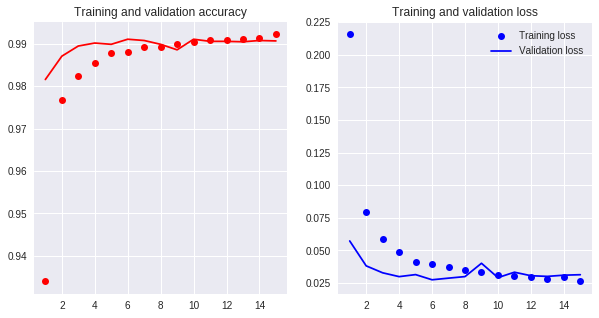

In [0]:
### init
history = history01

### get accuracy and loss along the iterations
acc      = history.history['acc']
val_acc  = history.history['val_acc']
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs   = range(1, len(acc) + 1)

### plot accuracy
fig, axes = plt.subplots(ncols=2, nrows=1, figsize = (10, 5))
ax = axes[0]
ax.plot(epochs, acc,     'bo', c = "red", label='Training acc')
ax.plot(epochs, val_acc, 'b',  c = "red", label='Validation acc')
ax.set_title('Training and validation accuracy')

ax = axes[1]
ax.plot(epochs, loss,     'bo', c = "blue", label='Training loss')
ax.plot(epochs, val_loss, 'b',  c = "blue", label='Validation loss')
ax.set_title('Training and validation loss')
ax.legend()

plt.show()

# Try to overtrain
First try: reduce the number of training set

**Re-build the model**

In [0]:
### Convolutional Neural Network
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

### Multilayer Perceptron (fully connected network)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

### Softmax operation
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

### model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

**Reduce the training dataset**

In [7]:
### observe data dimension
print("Original")
print("X_train:", x_train.shape)
print("y_train:", y_train.shape)
print("X_test: ", x_test.shape)
print("y_test: ", y_test.shape)

### reducing training data
x_train_red = x_train[:1000]
y_train_red = y_train[:1000]

### After reducing data
print("Reduce")
print("X_train:", x_train_red.shape)
print("y_train:", y_train_red.shape)
print("X_test: ", x_test.shape)
print("y_test: ", y_test.shape)

Original
X_train: (60000, 28, 28, 1)
y_train: (60000, 10)
X_test:  (10000, 28, 28, 1)
y_test:  (10000, 10)
Reduce
X_train: (1000, 28, 28, 1)
y_train: (1000, 10)
X_test:  (10000, 28, 28, 1)
y_test:  (10000, 10)


**Train the model**

In [0]:
### define number of epoch
epochs     = 100
batch_size = 64

### fit the model
history = model.fit(
    x_train_red, y_train_red,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

### Store the results
history02 = history
model02   = model

Train on 1000 samples, validate on 10000 samples
Epoch 1/100
1000/1000 [==============================] - 1s 1ms/step - loss: 1.7587 - acc: 0.3710 - val_loss: 1.0875 - val_acc: 0.6902
Epoch 2/100
1000/1000 [==============================] - 1s 767us/step - loss: 0.8472 - acc: 0.7380 - val_loss: 0.5539 - val_acc: 0.8230
Epoch 3/100
1000/1000 [==============================] - 1s 763us/step - loss: 0.5407 - acc: 0.8220 - val_loss: 0.4015 - val_acc: 0.8818
Epoch 4/100
1000/1000 [==============================] - 1s 754us/step - loss: 0.3625 - acc: 0.8920 - val_loss: 0.4021 - val_acc: 0.8829
Epoch 5/100
1000/1000 [==============================] - 1s 746us/step - loss: 0.2632 - acc: 0.9200 - val_loss: 0.2810 - val_acc: 0.9119
Epoch 6/100
1000/1000 [==============================] - 1s 727us/step - loss: 0.2204 - acc: 0.9320 - val_loss: 0.2325 - val_acc: 0.9318
Epoch 7/100
1000/1000 [==============================] - 1s 741us/step - loss: 0.1789 - acc: 0.9430 - val_loss: 0.2728 - val_acc: 0

**Visualizing loss and accuracy**

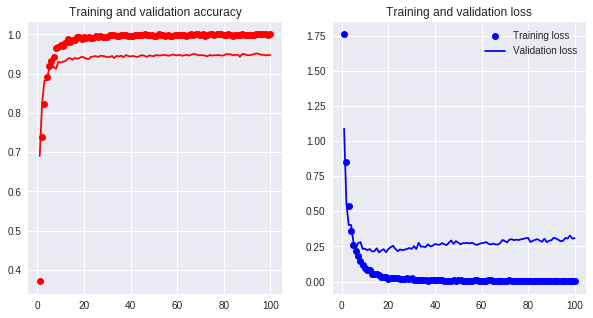

In [0]:
### init
history = history02

### get accuracy and loss along the iterations
acc      = history.history['acc']
val_acc  = history.history['val_acc']
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs   = range(1, len(acc) + 1)

### plot accuracy
fig, axes = plt.subplots(ncols=2, nrows=1, figsize = (10, 5))
ax = axes[0]
ax.plot(epochs, acc,     'bo', c = "red", label='Training acc')
ax.plot(epochs, val_acc, 'b',  c = "red", label='Validation acc')
ax.set_title('Training and validation accuracy')

ax = axes[1]
ax.plot(epochs, loss,     'bo', c = "blue", label='Training loss')
ax.plot(epochs, val_loss, 'b',  c = "blue", label='Validation loss')
ax.set_title('Training and validation loss')
ax.legend()

plt.show()

# Overtrain by modifying the model

**Modify the model: remove dropout**

In [0]:
### Convolutional Neural Network
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

### Multilayer Perceptron (fully connected network)
model.add(Flatten())
model.add(Dense(128, activation='relu'))

### Softmax operation
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

### model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
_________________________________________________________________


In [0]:
### define number of epoch
epochs     = 100
batch_size = 64

### fit the model
history = model.fit(
    x_train_red, y_train_red,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

### Store the results
history03 = history
model03   = model

Train on 1000 samples, validate on 10000 samples
Epoch 1/100
1000/1000 [==============================] - 1s 1ms/step - loss: 1.6632 - acc: 0.4620 - val_loss: 1.0629 - val_acc: 0.6885
Epoch 2/100
1000/1000 [==============================] - 1s 705us/step - loss: 0.6152 - acc: 0.8100 - val_loss: 0.4489 - val_acc: 0.8643
Epoch 3/100
1000/1000 [==============================] - 1s 712us/step - loss: 0.3604 - acc: 0.8930 - val_loss: 0.3327 - val_acc: 0.8955
Epoch 4/100
1000/1000 [==============================] - 1s 717us/step - loss: 0.2162 - acc: 0.9350 - val_loss: 0.3346 - val_acc: 0.8940
Epoch 5/100
1000/1000 [==============================] - 1s 703us/step - loss: 0.1435 - acc: 0.9680 - val_loss: 0.3226 - val_acc: 0.9012
Epoch 6/100
1000/1000 [==============================] - 1s 715us/step - loss: 0.0936 - acc: 0.9760 - val_loss: 0.3457 - val_acc: 0.8880
Epoch 7/100
1000/1000 [==============================] - 1s 714us/step - loss: 0.0672 - acc: 0.9840 - val_loss: 0.3324 - val_acc: 0

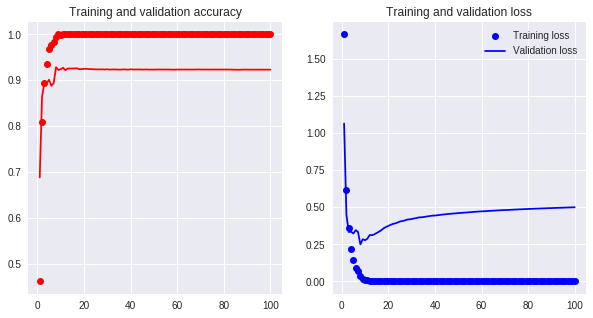

In [0]:
### init
history = history03

### get accuracy and loss along the iterations
acc      = history.history['acc']
val_acc  = history.history['val_acc']
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs   = range(1, len(acc) + 1)

### plot accuracy
fig, axes = plt.subplots(ncols=2, nrows=1, figsize = (10, 5))
ax = axes[0]
ax.plot(epochs, acc,     'bo', c = "red", label='Training acc')
ax.plot(epochs, val_acc, 'b',  c = "red", label='Validation acc')
ax.set_title('Training and validation accuracy')

ax = axes[1]
ax.plot(epochs, loss,     'bo', c = "blue", label='Training loss')
ax.plot(epochs, val_loss, 'b',  c = "blue", label='Validation loss')
ax.set_title('Training and validation loss')
ax.legend()

plt.show()

# Keep increasing the model

In [8]:
### Convolutional Neural Network
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))

### add one more conv2d layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

### Multilayer Perceptron (fully connected network)
model.add(Flatten())
model.add(Dense(128, activation='relu'))

### add one more dense layer
model.add(Dense(128, activation='relu'))

### Softmax operation
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

### model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               991360    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
__________

In [10]:
### define number of epoch
epochs     = 100
batch_size = 64

### fit the model
history = model.fit(
    x_train_red, y_train_red,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

### Store the results
history04 = history
model04   = model

Train on 1000 samples, validate on 10000 samples
Epoch 1/100
1000/1000 [==============================] - 4s 4ms/step - loss: 1.8570 - acc: 0.3700 - val_loss: 1.8040 - val_acc: 0.3898
Epoch 2/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.9303 - acc: 0.7000 - val_loss: 1.5768 - val_acc: 0.5239
Epoch 3/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.5540 - acc: 0.8260 - val_loss: 0.3554 - val_acc: 0.8900
Epoch 4/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.2380 - acc: 0.9220 - val_loss: 0.3727 - val_acc: 0.8874
Epoch 5/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1711 - acc: 0.9430 - val_loss: 0.3502 - val_acc: 0.8964
Epoch 6/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0988 - acc: 0.9740 - val_loss: 0.3273 - val_acc: 0.9108
Epoch 7/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0524 - acc: 0.9850 - val_loss: 0.3099 - val_acc: 0.9173
Epoch 

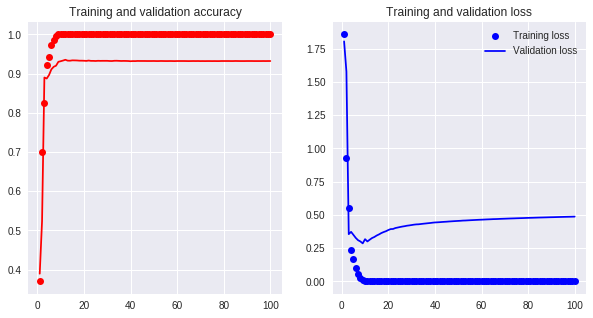

In [11]:
### init
history = history04

### get accuracy and loss along the iterations
acc      = history.history['acc']
val_acc  = history.history['val_acc']
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs   = range(1, len(acc) + 1)

### plot accuracy
fig, axes = plt.subplots(ncols=2, nrows=1, figsize = (10, 5))
ax = axes[0]
ax.plot(epochs, acc,     'bo', c = "red", label='Training acc')
ax.plot(epochs, val_acc, 'b',  c = "red", label='Validation acc')
ax.set_title('Training and validation accuracy')

ax = axes[1]
ax.plot(epochs, loss,     'bo', c = "blue", label='Training loss')
ax.plot(epochs, val_loss, 'b',  c = "blue", label='Validation loss')
ax.set_title('Training and validation loss')
ax.legend()

plt.show()